GWAS loci are taken from the CLOZUK paper Pardiñas et al Nature genetics, 2018, 50, 381-389  DOI 10.1038/s41588-018-0059-2.  This paper presented a meta analysis of the author's own GWAS and the earlier PGC2 GWAS.  CLOZUK comes from CLOZapine UK; clozapine is an antipsychotic medication mainly used for schizophrenia.

In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import genome
from bsmcalls import SNPnexus
from bsmcalls import operations
import matplotlib.pyplot as plt
import attila_utils
%matplotlib inline

In [2]:
fpath = '/home/attila/projects/bsm/resources/CLOZUK/supp-table-4.csv'
gwas = pd.read_csv(fpath, skiprows=7)
gwas['Chromosome'] = pd.Categorical(gwas['Chromosome'], ordered=True, categories=[str(y) for y in range(1, 23)] + list('XY'))
gwas.sort_values(['Chromosome', 'Start (BP)'], inplace=True)
gwas

,Locus,GWS in PGC2?,Chromosome,Start (BP),End (BP),Index SNP (dbSNP b141),A1,A2,OR,SE,P-value,Number of SNPs,Length (KB),Gene(s) tagged
40,41,Yes,1,2372397,2402499,rs4648845,C,T,0.926,0.011,6.740000e-12,27,30.102,PLCH2
86,87,Yes,1,8392592,8701288,rs34269918,G,GA,0.941,0.010,3.270000e-09,56,308.696,"RERE, SLC45A1"
38,39,Yes,1,30428943,30459412,rs6694545,A,G,1.080,0.011,6.200000e-12,46,30.469,LOC101929406
45,46,Yes,1,44029353,44137257,rs2970610,T,C,1.070,0.010,1.390000e-11,73,107.904,"KDM4A, PTPRF"
135,136,No,1,66304167,66333877,rs12129719,G,A,0.947,0.010,3.350000e-08,23,29.710,PDE4B
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,28,Yes,22,39840130,40091818,rs5757730,A,G,0.931,0.010,1.760000e-12,49,251.688,"LOC100506472, MGAT3, TAB1, CACNA1I, RPS19BP1"
24,25,Yes,22,41408754,41684093,rs9607782,T,A,0.922,0.011,5.540000e-13,104,275.339,"CHADL, EP300, EP300-AS1, L3MBTL2, MIR1281, MIR..."
13,14,Yes,22,42315790,42689370,rs6002655,C,T,0.928,0.010,2.150000e-14,119,373.580,"CENPM, LINC00634, MIR33A, SEPT3, SHISA8, SREBF..."
60,61,Yes,X,5859733,6029533,rs12009217,A,G,0.937,0.010,1.780000e-10,51,169.801,NLGN4X


In [3]:
%%bash
cd /home/attila/projects/bsm/resources/CLOZUK
fai=/big/data/refgenome/GRCh37/dna/hs37d5.fa.fai
# The genome.py module uses the bed file below
bed=/big/data/refgenome/GRCh37/dna/hs37d5.bed
sed 's/^\(\S\+\t\)\(\S\+\)\t.*$/\10\t\2/; /^Y/ q' $fai > $bed

In [4]:
coord_cols = ['Chromosome', 'Start (BP)', 'End (BP)']
cgwas = genome.complement_intervals(gwas, coord_cols=coord_cols, onebased=True) # complemented gwas data frame

In [5]:
cgwas['-log p-value'] = - np.log10(cgwas.loc[:, 'P-value'])
cgwas

,Locus,GWS in PGC2?,Chromosome,Start (BP),End (BP),Index SNP (dbSNP b141),A1,A2,OR,SE,P-value,Number of SNPs,Length (KB),Gene(s) tagged,-log p-value
0,NaN,NaN,1,0,2372396,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40,41.0,Yes,1,2372396,2402499,rs4648845,C,T,0.926,0.011,6.740000e-12,27.0,30.102,PLCH2,11.171340
1,NaN,NaN,1,2402499,8392591,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
86,87.0,Yes,1,8392591,8701288,rs34269918,G,GA,0.941,0.010,3.270000e-09,56.0,308.696,"RERE, SLC45A1",8.485452
2,NaN,NaN,1,8701288,30428942,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,61.0,Yes,X,5859732,6029533,rs12009217,A,G,0.937,0.010,1.780000e-10,51.0,169.801,NLGN4X,9.749580
166,NaN,NaN,X,6029533,68377125,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
26,27.0,Yes,X,68377125,68377205,rs62606711,A,G,1.075,0.010,1.260000e-12,4.0,0.079,PJA1,11.899629
167,NaN,NaN,X,68377205,155270560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
bedpath = '/home/attila/projects/bsm/resources/CLOZUK/gwas.bed'
cgwas[coord_cols + ['-log p-value']].to_csv(bedpath, sep='\t', header=False, index=False, na_rep='0')

## Discrepancy: calls in SCZ GWAS loci vs calls in SCZ GWAS genes

In [7]:
clozukpath = '/home/attila/projects/bsm/resources/CLOZUK/supp-table-4.csv'
gwasgenes = operations.get_geneset(df=pd.read_csv(clozukpath, skiprows=7), col='Gene(s) tagged')
print(len(gwasgenes), 'SCZ GWAS genes')

478 SCZ GWAS genes


In [8]:
data = SNPnexus.load_data('/home/attila/projects/bsm/results/2020-09-07-annotations/annotated-calls.p')
querydict = {'near_gens_Annotation': ['coding nonsyn', 'coding syn', 'missense', 'stop-gain', 'intronic (splice_site)'],
             'ensembl_Predicted Function': ['coding'],
             'near_gens_Overlapped Gene': {'SCZ GWAS genes': gwasgenes},
            }
results = operations.multiquery(querydict, data, do_sum=False, do_sort=False)

The cross tabulation table below compares calls in `SCZ GWAS genes` to SCZ GWAS **loci** (where `GWASpval` > 0).  The table shows that
* only 38 calls are in both SCZ GWAS genes and SCZ GWAS loci
* 90 calls are overlapped by SCZ GWAS genes but are not in SCZ GWAS loci
* 35 calls are in SCZ GWAS loci but not overlapped by SCZ GWAS genes

In [9]:
contingency = pd.crosstab(index=results[('near_gens_Overlapped Gene', 'SCZ GWAS genes')].astype('bool'), columns=(data['GWASpval'] > 0), margins=False)
contingency = contingency.rename_axis('in SCZ GWAS genes', axis='index').rename_axis('in SCZ GWAS loci', axis='columns')
contingency.style.set_caption('Number of calls')

in SCZ GWAS loci,False,True
in SCZ GWAS genes,,
False,6263,35
True,90,38


## Enrichment of Dx groups

In [10]:
gwasloci = pd.concat([data.groupby('Dx').size(), data.loc[data['GWASpval'] > 0].groupby('Dx').size()], axis=1).rename({0: 'all', 1: 'in SCZ GWAS loci'}, axis=1)
gwasloci

,all,in SCZ GWAS loci
Dx,,
Control,1653,17
SCZ,2488,28
ASD,2285,28


['named-figure/calls-in-scz-gwas-loci.png',
 'named-figure/calls-in-scz-gwas-loci.pdf']

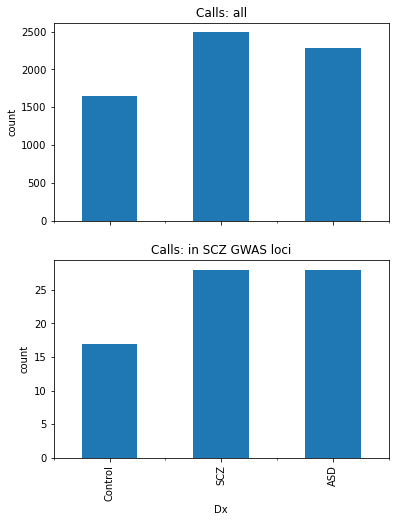

In [11]:
%matplotlib inline
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
for col, axi in zip(gwasloci.columns, [0, 1]):
    gwasloci[col].plot(kind='bar', ax=ax[axi])
    ax[axi].set_title('Calls: ' + col)
    ax[axi].set_ylabel('count')
attila_utils.savefig(fig, 'calls-in-scz-gwas-loci')

## Coordinate system issue?

The explanation for the discrepancy might be that the genomic coordinates were provided under GRCh38 by the PGC in their [CLOZUK paper](https://www.ncbi.nlm.nih.gov/pmc/articles/PMC5918692/) while I assumed GRCh37 when I annotated our callsets.  So far I haven't found any mention of which reference genome the PGC used for their study so I assumed GRCh38.

To test this assumption I used the [The NCBI remap service](https://www.ncbi.nlm.nih.gov/genome/tools/remap) to map the start and end locations of the SCZ GWAS loci to GRCh37.  As an input to the remapping I manually created `clozuk-reported-gwas-loci.bed` by extracting the `Chromosome`, `Start (BP)`, `End (BP)` columns.  The output `report_clozuk-reported-gwas-loci.bed.csv` is further analyzed here.

In [12]:
fpath = '/home/attila/projects/bsm/results/2020-07-28-CLOZUK/report_clozuk-reported-gwas-loci.bed.csv'
remapped = pd.read_csv(fpath, sep='\t')
remapped = remapped.set_index(['source_id', 'source_start'], drop=False)

This shows that an alternative method of annotating calls based on SCZ GWAS loci produces the same results as the original method (which annotated VCF files).

In [13]:
source = operations.is_in_segments(remapped[['source_id', 'source_start', 'source_stop']], data)
mapped = operations.is_in_segments(remapped[['mapped_id', 'mapped_start', 'mapped_stop']], data)
df = pd.crosstab(index=source, columns=(data['GWASpval'] > 0), margins=False)
df = df.rename_axis('new method', axis='index').rename_axis('original method', axis='columns')
df.style.set_caption('Number of calls in SCZ GWAS loci')

original method,False,True
new method,,
False,6353,0
True,0,73


Here we see how remapping from GRCh38 to GRCh37 changes the set of calls in SCZ GWAS loci

In [14]:
df = pd.crosstab(index=source, columns=mapped, margins=False)
df = df.rename_axis('published', axis='index').rename_axis('remap: GRCh38 -> GRCh37', axis='columns')
df.style.set_caption('Number of calls in SCZ GWAS loci')

remap: GRCh38 -> GRCh37,False,True
published,,
False,6314,39
True,41,32


This shows that remapping the start-stop positons of SCZ GWAS loci leads to even stronger discordance between calls in SCZ GWAS genes and calls in loci.

In [15]:
df = pd.crosstab(index=results[('near_gens_Overlapped Gene', 'SCZ GWAS genes')].astype('bool'), columns=mapped, margins=False)
df = df.rename_axis('in SCZ GWAS genes', axis='index').rename_axis('in SCZ GWAS loci (GRCh38 -> GRCh37)', axis='columns')
df.style.set_caption('Number of calls')

in SCZ GWAS loci (GRCh38 -> GRCh37),False,True
in SCZ GWAS genes,,
False,6242,56
True,113,15


The result suggests that the PGC authors used probably GRCh37 instead of GRCh38 and therefore it's not a coordinate system issue we are dealing with.

## Coding parts of loci

The next hypothesis is that SCZ GWAS loci are less enriched in SCZ calls than SCZ GWAS genes because the former not only contain noncoding variants, which tend to be less functionally important than coding variants, but also lack parts of those SCZ GWAS genes that strech beond the LD block defining the locus.

To test this hypothesis I filter variants for **coding** ones and compare that picture to the previous one termed **any** variants, which includes noncoding variants as well.  The table and plots below show that **coding** variants in SCZ GWAS loci are indeed enriched in SCZ calls unlike **any** variants

In [16]:
coding = ~ data['near_gens_Overlapped Gene'].isna()
coding_gwasloci = pd.concat([data.loc[coding].groupby('Dx').size(), data.loc[(data['GWASpval'] > 0) & coding].groupby('Dx').size()], axis=1).rename({0: 'all', 1: 'in SCZ GWAS loci'}, axis=1)
gwasloci1 = pd.concat([gwasloci, coding_gwasloci], axis=1)
gwasloci1.columns = pd.MultiIndex.from_product([['any', 'coding'], gwasloci.columns])
gwasloci1 = gwasloci1.reorder_levels([1, 0], axis=1).iloc[:, [0, 2, 1, 3]]
gwasloci1.style.set_caption('Number of calls')

['named-figure/calls-in-scz-gwas-loci-coding.png',
 'named-figure/calls-in-scz-gwas-loci-coding.pdf']

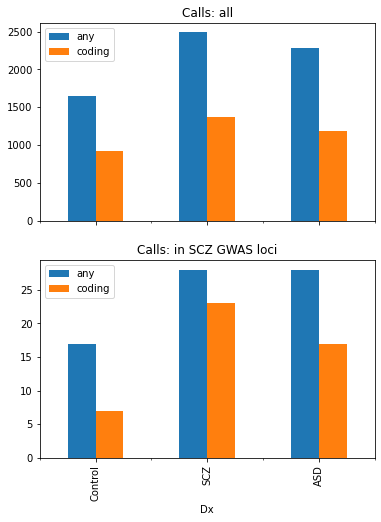

In [17]:
%matplotlib inline
fig, ax = plt.subplots(2, 1, figsize=(6, 8), sharex=True)
for axi, col in zip(ax, gwasloci1.columns.get_level_values(0).unique()):
    gwasloci1.xs(col, axis=1).plot(kind='bar', ax=axi)
    axi.set_title('Calls: ' + col)
attila_utils.savefig(fig, 'calls-in-scz-gwas-loci-coding')

## Remaining discrepancy
First recall the discrepancy given by the original contingency table

In [18]:
contingency.style.set_caption('Number of calls')

in SCZ GWAS loci,False,True
in SCZ GWAS genes,,
False,6263,35
True,90,38


We see that the contingency between calls in SCZ GWAS genes and those in SCZ GWAS loci improves when we base our contingency table on only **coding** variants

In [19]:
df = pd.crosstab(index=results[('near_gens_Overlapped Gene', 'SCZ GWAS genes')].astype('bool'), columns=(data['GWASpval'] > 0) & coding, margins=False)
df = df.rename_axis('in SCZ GWAS genes', axis='index').rename_axis('in SCZ GWAS loci', axis='columns')
df.style.set_caption('Number of calls')

in SCZ GWAS loci,False,True
in SCZ GWAS genes,,
False,6289,9
True,90,38


The remaining discrepancy is due to genes not listed aming the SCZ GWAS genes

In [20]:
data.loc[(data['GWASpval'] > 0) & coding & ~ results[('near_gens_Overlapped Gene', 'SCZ GWAS genes')], 'near_gens_Overlapped Gene']

Individual ID  CHROM  POS        Mutation
CMC_MSSM_161   6      33652345   C/T                                {ITPR3}
CMC_MSSM_343   6      31607395   A/C                                 {BAG6}
CMC_MSSM_370   6      32286038   A/G                              {C6orf10}
CMC_PITT_036   6      28565106   A/G                               {SCAND3}
AN05983        18     53799852   A/T         {RP11-456O19.4, CTD-2008L17.2}
AN13654        1      190617632  C/T                         {RP11-463J7.2}
UMB1465        5      152500272  C/A                           {AC091969.1}
UMB4899        6      33133388   G/A                              {COL11A2}
UMB5297        1      190713407  T/C                         {RP11-463J7.2}
Name: near_gens_Overlapped Gene, dtype: object

1. The genes on chrom 6 are all on one locus that is labeled by xMHC by the PGC in the CLOZUK paper.  This is the major histocompatibility complex, which contains multiple genes
1. For the locus on chrom 18 PGC lists TCF4, LOC101927273, LOC100505474 as SCZ GWAS genes; these might correspond to CTD-2008L17.2, RP11-456O19.4
1. For the locus on chrom 1 PGC lists LOC440704, which contains LINC01720; what's the relation of LINC01720 to RP11-463J7.2 and/or RP11-463J7.2?
1. For the locus on chrom 5 PGC lists LOC101927134, which contains LINC01470; would it be AC091969.1?  Yes, see [this page](https://grch37.ensembl.org/Homo_sapiens/Gene/Summary?g=ENSG00000249484;r=5:151998525-152603103)

## Conclusion

1. SCZ GWAS genes are more informative to SCZ pathological mechanism than SCZ GWAS loci because the latter contain also noncoding parts (which are less likely functional) besides genes.  On the other hand SCZ GWAS loci only partially overlap with some SCZ GWAS genes and thus exclude some somatic variants in the non-overlapping parts of SCZ GWAS genes.
1. The SCZ GWAS gene set provided by the PGC in the CLOZUK paper
    * does not list genes of xMHC explicitly
    * lists several loci like LOC101927134 that seem to represent LINC RNAs
1. Given these findings best way to study enrichment of SCZ variants in SCZ GWAS genes is to combine the `data['GWASpval'] > 0` filter with `coding = ~ data['near_gens_Overlapped Gene'].isna()` in order to get coding regions in GWAS loci
1. This approach can be extended to variants located in SCZ GWAS genes stretching outside of SCZ GWAS loci

In [21]:
%connect_info

{
  "shell_port": 42315,
  "iopub_port": 57141,
  "stdin_port": 59467,
  "control_port": 46807,
  "hb_port": 48395,
  "ip": "127.0.0.1",
  "key": "e25bb021-a7252265724ba4253e30641c",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-b4f120fa-ba01-4843-9c17-e818e6840b91.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
